In [1]:
!pip install import-ipynb

  Using cached import_ipynb-0.1.3-py3-none-any.whl


In [3]:
import numpy as np
#LIBRERÍAS PARA TODO LO NECESARIO: 
#!pip install qiskit ipywidgets    correr esta línea de primero si se trabaja en google collab

#Importación de qiskit
from qiskit import *

%matplotlib inline
from matplotlib import *

#Se importan clases y funciones necesarias para la tomografía
import qiskit.quantum_info as qi
from qiskit.compiler import assemble
import numpy as np 
from numpy import *

# Librerías estandar de qiskit
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.quantum_info import *
from qiskit.extensions import Initialize
import import_ipynb

#Funciones creadas para generar estados aleatorios
from qubit_aleatorio import estado_aleatorio_normal
import qubit_aleatorio as al
# Función para tomografía de estado 
from qiskit.ignis.verification.tomography import state_tomography_circuits, StateTomographyFitter

#Para dibujar sobre la esfera de bloch
from kaleidoscope import bloch_sphere

provider = IBMQ.load_account()

In [4]:
a = open("fidelidad.txt", "r")
fidelidad=[]
for i in a:
    fidelidad.append(float(i))
a.close()

a = open("pureza.txt", "r")
pureza=[]
for i in a:
    pureza.append(float(i))
a.close()

fidelidad=np.array(fidelidad)
pureza=np.array(pureza)



In [5]:
import numpy as np
init_states= np.array([ [ 0.04473833-0.4934137j,  -0.02890677+0.86816231j],
[ 0.13615537-0.5674603j,  -0.74799676+0.31615086j],
[-0.08515162+0.44030261j, -0.86381447-0.22958087j],
[ 0.6362245 -0.60713378j,-0.45582131-0.13723664j],
[-0.5244627 +0.70001861j, -0.47217441+0.10938074j],
[-0.21224734-0.73216326j,  0.34875853-0.54521144j],
[ 0.0902853 -0.87780366j, -0.43788796+0.17194018j],
[ 0.55477193+0.071505j,   -0.66770665-0.49120563j],
[ 0.55124919+0.09211778j, -0.04228485-0.828161j  ],
[0.83217562-0.34512787j, 0.13468549+0.41258976j],
[0.08567152+0.4385004j,  0.66038103-0.60355172j],
[ 0.04130315-0.43802598j, -0.89453018+0.07901297j],
[0.64430191+0.5281681j,  0.52908327+0.16119676j],
[-0.583302  -0.71731443j,  0.36351955+0.11433426j],
[-0.46654788+0.00211442j, -0.61098754+0.63954892j],
[-0.71592258-0.42768113j,  0.5195951 -0.18591566j],
[-0.18140859-0.7783767j,   0.32462138-0.50580786j],
[-0.56504056-0.35903453j,  0.53250243+0.5179426j ],
[0.31185339+0.36284118j, 0.60390651-0.63748777j],
[ 0.26132908+0.50040982j, -0.41046632-0.71611069j],
[ 0.13364294+0.67373973j, -0.06441468-0.7239234j ],
[-0.30582574-0.76553035j,  0.26939737-0.49785434j],
[-0.41764612+0.78063361j,  0.34001854+0.31712816j],
[-0.02629641-0.20991291j, -0.69050995-0.69169436j],
[ 0.35614658+0.5237932j,  -0.77353871-0.02093237j],
[-0.04442961+0.57344436j, -0.20589104+0.79170478j],
[ 0.34047627-0.33697117j, -0.05207193-0.87625045j],
[-0.41114956-0.82287634j, -0.09813904+0.37973582j],
[0.84816603-0.44463983j, 0.17725197+0.2269175j ],
[-0.0476359 -0.75194116j, -0.64845589-0.10872111j],
[ 0.06138713+0.15823132j, -0.96611931+0.19444268j],
[-0.70568847-0.22817718j, -0.62659   -0.23942416j],
[ 0.49400344-0.35870425j, -0.05377592+0.79018986j],
[-0.50863026+0.34673481j, -0.78686627+0.04372307j],
[-0.4256483 +0.18873163j, -0.27605152+0.8408326j ],
[-0.05091017-0.39770593j, -0.89716247+0.1853042j ],
[0.71499654-0.64105957j, 0.2763037 +0.03845564j],
[ 0.17269593-0.37093016j, -0.50287654-0.76138172j],
[-0.11476873-0.15934881j, -0.1096411 -0.97437925j],
[-0.89736722-0.0424663j,  0.41680696-0.13856637j],
[ 0.08947892-0.94940025j, -0.28000386+0.1105917j ],
[-0.06876411-0.88468801j, -0.37943617+0.26196719j],
[0.04642152+0.85151353j, 0.35718831-0.38103315j],
[ 0.49446162+0.45907914j, -0.72046314-0.16027138j],
[-0.13651602-0.65632778j,  0.63119943-0.39010832j],
[0.0509375 +0.65316134j, 0.17384464+0.73523036j],
[-0.75410138-0.5791323j,   0.30919657+0.01828576j],
[0.05533885-0.45125325j, 0.82199893+0.34296629j],
[0.27984848+0.48115836j, 0.66135574-0.50277236j],
[-0.47975103-0.21357616j,  0.79981467+0.29072436j],
[-0.91098685-0.30313189j, -0.13810329-0.24319025j],
[-0.91046391-0.02312972j, -0.32073654-0.26009336j],
[0.29293947-0.67315538j, 0.54477405+0.40530177j],
[ 0.66392808+0.08150688j, -0.7322309 -0.12803925j],
[ 0.58744216-0.19855004j, -0.65996102+0.42419459j],
[-0.92198434+0.13521765j,  0.24878908-0.26413078j],
[-0.05822317+0.01090782j, -0.93072415-0.36089284j],
[0.5870664-0.45521987j, 0.0746505+0.66524824j],
[-0.71668544-0.38476235j,  0.21051474-0.54222086j],
[0.4524163+0.51203853j, 0.1762931-0.70855965j],
[-0.54504508+0.08536616j, -0.82079642-0.14809362j],
[0.14144764-0.46165306j, 0.17406722+0.85823634j],
[0.63374947+0.51165725j, 0.55847668-0.15707409j],
[-0.37994421+0.37516341j,  0.7989548 +0.27670568j],
[-0.62233879-0.40529354j, -0.66364594-0.08947429j],
[-0.64966145+0.36902302j, -0.19527405+0.63531887j],
[0.18462797+0.71515842j, 0.64985913-0.17928762j],
[ 0.69977257-0.43355745j, -0.5331752 -0.19511661j],
[0.05306928+0.72344861j, 0.62656923+0.28498554j],
[ 0.17800591+0.06291296j, -0.07366122+0.97924965j],
[ 0.04368979+0.07385668j, -0.97475137+0.20614596j],
[-0.57536135+0.38808583j, 0.36838375+0.61858073j],
[0.3937683 +0.66288276j, 0.55357721+0.3147781j ],
[0.90997776-0.1370495j,  0.32859343-0.21256591j],
[ 0.94204985-0.31211981j, -0.12179125-0.01703515j],
[-0.68560332+0.32440285j,  0.28324491-0.58692691j],
[-0.16507685-0.89246551j,  0.3828126 +0.17236431j],
[-0.5056217 +0.25081015j, -0.29707776-0.77018554j],
[-0.04457897+0.0448106j,  0.03052331-0.99753348j],
[ 0.1075571 +0.54144765j, -0.12299574-0.82470477j],
[ 0.18365999+0.40742357j, -0.77913811+0.43956667j],
[-0.39601245+0.45237416j, -0.64091722-0.47723881j],
[-0.80995112+0.12554923j, -0.57283964+0.00844567j],
[ 0.20939533-0.7189887j,  -0.63810147-0.17898423j],
[0.15199594+0.62961083j, 0.33914053+0.68225445j],
[-0.78169678-0.44589939j, -0.36990166-0.23086065j],
[ 0.1014499 -0.68741668j, -0.71455004-0.08114469j],
[-0.31175194-0.44695767j,  0.44439194+0.71102418j],
[-0.66826194+0.38990232j, -0.20896153-0.5981114j ],
[-0.81569194+0.52902983j,  0.08716049-0.21720303j],
[-0.85673653-0.43286454j,  0.06213802+0.27344044j],
[ 0.055564  -0.5729058j, -0.69283956+0.43435577j],
[ 0.54066065+0.59689799j, -0.27269253+0.52634364j],
[ 0.8868001 +0.24094745j, -0.22379442+0.32472445j],
[-0.01852851-0.45217024j, -0.17098435+0.87519319j],
[-0.58068968+0.56469741j,  0.57557552+0.11237946j],
[-0.16289803+0.31439106j, -0.05793222-0.93341649j],
[-0.63188734-0.26183966j, -0.56373421+0.46299258j],
[-0.07193334-0.44218159j, -0.83703599-0.31412066j],
[ 0.13694277+0.83534935j, -0.51761344+0.12455706j],
[-0.0487966 -0.3986355j, -0.89998274+0.16952785j],
[ 0.23388555+0.76668354j, -0.59614492-0.04588169j],
[-0.51088826+0.75030368j,  0.19134351-0.37339688j],
[-0.81051507-0.09096912j,  0.35041978-0.46043015j],
[-0.11480389+0.3886823j,  -0.0979174 -0.90893252j],
[-0.59433694+0.05491713j,  0.47596526+0.64591392j],
[-0.53183053+0.27241934j,  0.62981392-0.49626446j],
[0.72361537-0.09028556j, 0.62431012+0.28011817j],
[-0.28872284-0.18676504j, -0.02671729-0.93863951j],
[ 0.36164863+0.12750179j, -0.16035536-0.9095272j ],
[-0.09758675+0.34631152j,  0.92121012+0.14804417j],
[-0.58101769-0.03284083j,  0.27244448+0.7662336j ],
[0.35455688+0.22807408j, 0.568789  -0.70622285j],
[-0.0270414 +0.03003561j,  0.00438355+0.99917336j],
[-0.04204511-0.24740317j, -0.95705673-0.14514235j],
[0.34777605+0.62804656j, 0.49366597-0.49081896j],
[-0.25924001+0.01413071j, -0.96570953-0.00020921j],
[-0.47136349+0.29261334j, -0.17803508-0.81270991j],
[0.35399065+0.42758129j, 0.00256912+0.83178018j],
[-0.59389598+0.62569956j,  0.37593983+0.33831476j],
[-0.89990321+0.1740185j,   0.2344156 -0.32394614j],
[-0.3534052 -0.29815567j, -0.41545994+0.78332688j],
[ 0.5977712 +0.29390728j, -0.56807839+0.48329603j],
[-0.33809059+0.93027214j,  0.103607  -0.09774497j],
[-0.63637012+0.25869678j, -0.69639934-0.20769447j],
[0.10394984+0.46882774j, 0.28290779+0.83027595j],
[-0.61593263+0.52178717j, -0.48300722+0.33921847j],
[ 0.90398064+0.25802028j, -0.2348151 +0.24719712j],
[-0.61551439+0.70454529j,  0.3343162 +0.11397654j],
[ 0.49689673+0.76403466j, -0.27588318-0.30534104j],
[-0.45715298-0.85476142j, -0.10994525+0.2197865j ],
[ 0.89453536-0.01708363j, -0.39425334+0.20994985j],
[0.6633464 -0.0778754j,  0.28401326+0.68792692j],
[-0.25359117+0.91104219j,  0.14708708+0.28992937j],
[-0.40058708+0.10464659j, -0.51521848-0.75041922j],
[ 0.26024058+0.8491446j,  -0.30543814+0.34341787j],
[-0.25976763-0.31421525j, -0.89773499-0.16691747j],
[0.20787814-0.61495641j, 0.56887347+0.50497353j],
[-0.2957039 +0.5080005j,   0.72399231-0.36101223j],
[-0.1943384 +0.09372858j, -0.91540477+0.33982592j],
[-0.71713715-0.45387962j,  0.45491582-0.26973912j],
[-0.89610216+0.40909362j, -0.12966974-0.11326553j],
[0.50611052+0.5272617j,  0.16996778-0.66102814j],
[0.11553316-0.86359897j, 0.41450767-0.26273999j],
[ 0.13659721+0.06625728j, -0.10654072+0.98264961j],
[-0.14706085+0.77917333j, -0.03668491+0.6082074j ],
[0.60309088+0.28377695j, 0.19127554+0.72053154j],
[-0.02270144+0.36074025j, -0.26935109+0.89263716j],
[ 0.72221883-0.44073349j, -0.18435101+0.50016863j],
[ 0.52297901-0.02101233j, -0.00884565+0.8520406j ],
[-0.341273  +0.43090961j,  0.25784973-0.79458364j],
[0.25546133+0.82362278j, 0.4636678 +0.20346302j],
[-0.26326165+0.19149386j,  0.92877045-0.17722544j],
[-0.23266555-0.60354385j,  0.75608967-0.09964921j],
[ 0.43017929-0.66558679j, -0.51414485+0.32801688j],
[-0.02359826-0.20757973j, -0.94202371-0.26257399j],
[-0.53871879-0.22110646j,  0.38811087+0.71432762j],
[0.55980934-1.14477840e-04j, 0.17982431-8.08873727e-01j],
[-0.24606385-0.58666213j,  0.05733647+0.76941059j],
[ 0.27665341+0.69244233j, -0.65854816-0.10149299j],
[-0.9686882 -0.10239276j,  0.18265798-0.13339771j],
[-0.37411963-0.71816294j,  0.42858776+0.4007356j ],
[-0.7308653 +0.61913224j,  0.01036845+0.2870604j ],
[ 0.5351737 -0.53025411j, -0.49025212+0.43826082j],
[ 0.37464677-0.1477492j,  -0.91530164-0.00573353j],
[0.90585794-0.03849816j, 0.19011893-0.37655555j],
[0.57520471-0.20350357j, 0.01827613-0.79208069j],
[0.29795549-0.43214297j, 0.07867998+0.84751663j],
[-0.35834524+0.45005005j,  0.43357838+0.69358015j],
[-0.05696327-0.24556399j,  0.48281236-0.83865711j],
[ 0.82511481+0.01062727j, -0.20687047-0.52562079j],
[ 0.43527936-0.32085259j, -0.26174258-0.79942249j],
[-0.21322178+0.84833029j,  0.44360698-0.19515389j],
[0.26868592+0.02627892j, 0.74245911-0.61308381j],
[-0.18669759-0.15555315j,  0.38387183+0.89083649j],
[-0.13776387-0.96489128j, -0.22260589-0.02127321j],
[-0.51303862-0.64396652j,  0.53043606+0.20183183j],
[-0.89668557-0.19417877j,  0.33820209+0.20944915j],
[-0.43819646-0.12691309j,  0.82559352+0.33207269j],
[-0.03304159-0.82477612j,  0.10148486+0.55529581j],
[-0.61258288-0.48537956j,  0.19290643+0.59324194j],
[0.22983622+0.68265538j, 0.66836273+0.18560228j],
[ 0.56712172-0.68004591j, -0.41120336+0.21638463j],
[-0.03471103+0.63936982j, -0.75780757+0.12541558j],
[-0.4521738 -0.24018899j, -0.52421855-0.68047264j],
[-0.06440743-0.81806336j, -0.56185305+0.10461918j],
[ 0.85819223-0.1574678j, -0.25102849-0.41915951j],
[0.19595124-0.14409589j, 0.19061494+0.9510549j ],
[0.19595124-0.14409589j, 0.19061494+0.9510549j ],
[ 0.26674742-0.35505621j, -0.07363118+0.8929498j ],
[0.70789495+0.37571122j, 0.41615185+0.42958522j],
[-0.16034169-0.65749315j,  0.31050251-0.66751891j],
[-0.70951874-0.17051292j, -0.6782762 -0.08631277j],
[0.11066762+0.9483083j,  0.0719817 -0.28858739j],
[-0.08671216+0.64181955j,  0.16950774+0.74284305j],
[-0.24600118+0.16883263j, -0.50761195+0.80827537j],
[ 0.84997729-0.38195929j, -0.20196167-0.30142526j],
[0.10648166-0.30979803j, 0.92839706-0.17540164j],
[-0.59730607-0.1645723j,  -0.73695179+0.27026558j],
[-0.94468487+0.20156076j, -0.15269621-0.20887228j],
[-0.38359877-0.34851137j,  0.76834964-0.37554048j],
[ 0.32313372+0.63512457j, -0.56685411+0.41337368j],
[-0.31987373+0.20381991j,  0.01679783+0.92512489j],
[ 0.23173701-0.61747456j, -0.74658364+0.08738414j],
[-0.49244189+0.70452346j, -0.48802784+0.15158006j],
[ 0.08190876-0.32483511j, -0.90057423-0.27701833j],
[-0.33638944-0.11221412j,  0.87708395-0.32399674j],
[-0.25405632-0.58642725j, -0.61572396-0.46091482j],
[0.52639466-0.13175785j, 0.6006737 -0.58714534j], ])




rho_final= [[[0.4722+0.j,   0.073 -0.0138j],
 [0.073 +0.0138j,0.5278+0.j]],
[[0.496 +0.j,   0.0894-0.0514j],
 [0.0894+0.0514j,0.504 +0.j]],
[[0.4896+0.j,   0.0482+0.0238j],
 [0.0482-0.0238j,0.5104+0.j]], 
[[0.6784+0.j, 0.0818-0.04j],
 [0.0818+0.04j,0.3216+0.j]],
[[ 0.7098+0.j, -0.0248+0.03j],
 [-0.0248-0.03j,0.2902+0.j]],
[[ 0.5388+0.j,   -0.0312-0.0348j],
 [-0.0312+0.0348j,0.4612+0.j]],
[[0.6622+0.j,   0.066 -0.1042j],
 [0.066 +0.1042j,0.3378+0.j]],
[[0.4646+0.j,   0.0054-0.0368j],
 [0.0054+0.0368j,0.5354+0.j]],
[[ 0.4618+0.j,   -0.049 +0.0092j],
 [-0.049 -0.0092j,0.5382+0.j]],
[[ 0.6434+0.j,   -0.0022-0.0372j],
 [-0.0022+0.0372j,0.3566+0.j]],
[[0.4494+0.j,   0.0648-0.0718j],
 [0.0648+0.0718j,0.5506+0.j]],
[[0.3942+0.j,  0.0882-0.051j],
 [0.0882+0.051j,0.6058+0.j]],
[[0.5962+0.j,  0.0294-0.065j],
 [0.0294+0.065j,0.4038+0.j]],
[[0.7116+0.j,   0.0402-0.0144j],
 [0.0402+0.0144j,0.2884+0.j]],
[[0.4146+0.j,   0.017 -0.0068j],
 [0.017 +0.0068j,0.5854+0.j]],
[[0.661 +0.j,   0.0858+0.0176j],
 [0.0858-0.0176j,0.339 +0.j]],
[[ 0.6482+0.j,   -0.0216+0.0282j],
 [-0.0216-0.0282j,0.3518+0.j]],
[[0.534 +0.j,   0.0976+0.0144j],
 [0.0976-0.0144j,0.466 +0.j]],
[[0.4274+0.j,  0.007 -0.013j],
 [0.007 +0.013j,0.5726+0.j]],
[[0.4058+0.j,   0.0196-0.0024j],
 [0.0196+0.0024j,0.5942+0.j]],
[[ 0.4828+0.j,   -0.0086-0.0186j],
 [-0.0086+0.0186j,0.5172+0.j]],
[[0.6426+0.j,   0.0232+0.0146j],
 [0.0232-0.0146j,0.3574+0.j]],
[[ 0.6926+0.j,   -0.006 -0.0468j],
 [-0.006 +0.0468j,0.3074+0.j]],
[[0.2252+0.j,   0.0254+0.0548j],
 [0.0254-0.0548j,0.7748+0.j]],
[[ 0.457 +0.j,   -0.0138+0.1172j],
 [-0.0138-0.1172j,0.543 +0.j]],
[[ 0.4102+0.j,   -0.1168+0.0202j],
 [-0.1168-0.0202j,0.5898+0.j]],
[[0.3532+0.j, 0.0228-0.14j],
 [0.0228+0.14j,0.6468+0.j]],
[[0.721 +0.j,   0.0278-0.0356j],
 [0.0278+0.0356j,0.279 +0.j]],
[[0.763 +0.j, 0.0498-0.07j],
 [0.0498+0.07j,0.237 +0.j]],
[[0.576 +0.j,   0.0256-0.0102j],
 [0.0256+0.0102j,0.424 +0.j]],
[[0.256 +0.j,   0.0348+0.0112j],
 [0.0348-0.0112j,0.744 +0.j]],
[[0.5502+0.j,  0.071 +0.035j],
 [0.071 -0.035j,0.4498+0.j]],
[[ 0.4596+0.j,   -0.1008-0.0014j],
 [-0.1008+0.0014j,0.5404+0.j]],
[[ 0.4712+0.j,   -0.0968+0.0468j],
 [-0.0968-0.0468j,0.5288+0.j]],
[[ 0.37  +0.j,   -0.0138+0.0006j],
 [-0.0138-0.0006j,0.63  +0.j]],
[[ 0.3408+0.j,   -0.021 +0.0096j],
 [-0.021 -0.0096j,0.6592+0.j]],
[[0.7726+0.j,   0.0324+0.0152j],
 [0.0324-0.0152j,0.2274+0.j]],
[[ 0.3466+0.j,  -0.0034+0.009j],
 [-0.0034-0.009j,0.6534+0.j]],
[[0.2944+0.j,   0.0494-0.0428j],
 [0.0494+0.0428j,0.7056+0.j]],
[[0.6962+0.j,  0.1134+0.006j],
 [0.1134-0.006j,0.3038+0.j]],
[[0.7586+0.j,   0.0552-0.0636j],
 [0.0552+0.0636j,0.2414+0.j]],
[[0.7166+0.j,   0.1574-0.0674j],
 [0.1574+0.0674j,0.2834+0.j]],
[[0.662 +0.j,   0.0082-0.0372j],
 [0.0082+0.0372j,0.338 +0.j]],
[[0.5074+0.j,   0.1152+0.0032j],
 [0.1152-0.0032j,0.4926+0.j]],
[[ 0.5032+0.j,   -0.0136+0.0776j],
 [-0.0136-0.0776j,0.4968+0.j]],
[[ 0.484+0.j,   -0.127-0.0042j],
 [-0.127+0.0042j,0.516+0.j]],
[[0.7626+0.j,   0.043 -0.0054j],
 [0.043 +0.0054j,0.2374+0.j]],
[[0.377 +0.j,   0.0556+0.0442j],
 [0.0556-0.0442j,0.623 +0.j]],
[[ 0.4476+0.j,   -0.0132-0.0124j],
 [-0.0132+0.0124j,0.5524+0.j]],
[[0.4114+0.j,   0.0298-0.0338j],
 [0.0298+0.0338j,0.5886+0.j]],
[[ 0.7528+0.j,   -0.0488-0.0544j],
 [-0.0488+0.0544j,0.2472+0.j]],
[[ 0.719 +0.j,  -0.0554+0.053j],
 [-0.0554-0.053j,0.281 +0.j]],
[[0.5794+0.j,   0.1102-0.1418j],
 [0.1102+0.1418j,0.4206+0.j]],
[[0.4856+0.j,   0.017 +0.0408j],
 [0.017 -0.0408j,0.5144+0.j]],
[[ 0.4846+0.j,   -0.0244-0.1734j],
 [-0.0244+0.1734j,0.5154+0.j]],
[[0.7474+0.j,   0.0018-0.1418j],
 [0.0018+0.1418j,0.2526+0.j]],
[[0.2836+0.j,   0.0646-0.0374j],
 [0.0646+0.0374j,0.7164+0.j]],
[[0.5896+0.j,   0.0694-0.1198j],
 [0.0694+0.1198j,0.4104+0.j]],
[[0.6172+0.j,   0.1276-0.1288j],
 [0.1276+0.1288j,0.3828+0.j]],
[[ 0.514 +0.j,   -0.0204-0.0208j],
 [-0.0204+0.0208j,0.486 +0.j]],
[[0.4448+0.j,   0.1358+0.0422j],
 [0.1358-0.0422j,0.5552+0.j]],
[[ 0.3788+0.j,   -0.0164+0.0086j],
 [-0.0164-0.0086j,0.6212+0.j]],
[[0.634 +0.j,   0.0362+0.0392j],
 [0.0362-0.0392j,0.366 +0.j]],
[[0.4136+0.j,   0.0124-0.0094j],
 [0.0124+0.0094j,0.5864+0.j]],
[[ 0.5556+0.j,   -0.0126+0.0234j],
 [-0.0126-0.0234j,0.4444+0.j]],
[[ 0.5536+0.j,  -0.0106+0.014j],
 [-0.0106-0.014j,0.4464+0.j]],
[[0.5736+0.j,   0.0134-0.0218j],
 [0.0134+0.0218j,0.4264+0.j]],
[[0.6488+0.j,  0.0576-0.034j],
 [0.0576+0.034j,0.3512+0.j]],
[[0.5394+0.j,  0.036 -0.032j],
 [0.036 +0.032j,0.4606+0.j]],
[[0.2924+0.j,   0.085 -0.0616j],
 [0.085 +0.0616j,0.7076+0.j]],
[[ 0.254 +0.j,   -0.0078-0.0192j],
 [-0.0078+0.0192j,0.746 +0.j]],
[[ 0.516 +0.j,   -0.0636+0.0504j],
 [-0.0636-0.0504j,0.484 +0.j]],
[[ 0.5704+0.j,  -0.0238-0.004j],
 [-0.0238+0.004j,0.4296+0.j]],
[[0.7372+0.j,   0.043 -0.0612j],
 [0.043 +0.0612j,0.2628+0.j]],
[[0.8086+0.j,   0.051 -0.0302j],
 [0.051 +0.0302j,0.1914+0.j]],
[[0.5654+0.j,   0.054 -0.0214j],
 [0.054 +0.0214j,0.4346+0.j]],
[[0.7232+0.j,   0.0228-0.0262j],
 [0.0228+0.0262j,0.2768+0.j]],
[[0.4392+0.j,   0.003 -0.0328j],
 [0.003 +0.0328j,0.5608+0.j]],
[[0.2714+0.j,   0.0362-0.0388j],
 [0.0362+0.0388j,0.7286+0.j]],
[[0.4404+0.j,   0.0076-0.0472j],
 [0.0076+0.0472j,0.5596+0.j]],
[[0.3776+0.j,  0.0562-0.059j],
 [0.0562+0.059j,0.6224+0.j]],
[[ 0.4746+0.j,   -0.0554+0.0506j],
 [-0.0554-0.0506j,0.5254+0.j]],
[[0.6202+0.j,   0.015 +0.0198j],
 [0.015 -0.0198j,0.3798+0.j]],
[[0.5904+0.j,   0.0694-0.0706j],
 [0.0694+0.0706j,0.4096+0.j]],
[[ 0.491 +0.j,   -0.0474-0.0096j],
 [-0.0474+0.0096j,0.509 +0.j]],
[[0.7048+0.j,   0.0108+0.0134j],
 [0.0108-0.0134j,0.2952+0.j]],
[[ 0.5086+0.j,   -0.0376-0.0046j],
 [-0.0376+0.0046j,0.4914+0.j]],
[[0.4326+0.j,   0.041 -0.0232j],
 [0.041 +0.0232j,0.5674+0.j]],
[[0.5916+0.j,   0.0438-0.0356j],
 [0.0438+0.0356j,0.4084+0.j]],
[[0.7792+0.j,   0.004 -0.0406j],
 [0.004 +0.0406j,0.2208+0.j]],
[[0.7574+0.j,   0.0544-0.0574j],
 [0.0544+0.0574j,0.2426+0.j]],
[[0.4336+0.j,  0.0902-0.115j],
 [0.0902+0.115j,0.5664+0.j]],
[[ 0.6162+0.j,   -0.0808-0.0034j],
 [-0.0808+0.0034j,0.3838+0.j]],
[[0.7108+0.j,   0.0656+0.0764j],
 [0.0656-0.0764j,0.2892+0.j]],
[[0.389 +0.j,  0.1494+0.022j],
 [0.1494-0.022j,0.611 +0.j]],
[[0.6132+0.j,   0.0982-0.1228j],
 [0.0982+0.1228j,0.3868+0.j]],
[[0.3498+0.j,   0.0358-0.0694j],
 [0.0358+0.0694j,0.6502+0.j]],
[[0.525 +0.j,   0.0402-0.0332j],
 [0.0402+0.0332j,0.475 +0.j]],
[[0.3686+0.j,   0.065 -0.1324j],
 [0.065 +0.1324j,0.6314+0.j]],
[[0.663 +0.j,   0.0266-0.0468j],
 [0.0266+0.0468j,0.337 +0.j]],
[[ 0.3348+0.j,   -0.0326+0.0166j],
 [-0.0326-0.0166j,0.6652+0.j]],
[[0.6156+0.j,  0.0138-0.034j],
 [0.0138+0.034j,0.3844+0.j]],
[[0.708 +0.j,   0.0504-0.0246j],
 [0.0504+0.0246j,0.292 +0.j]],
[[0.6408+0.j,  0.0256+0.037j],
 [0.0256-0.037j,0.3592+0.j]],
[[0.33  +0.j,   0.0928-0.0008j],
 [0.0928+0.0008j,0.67  +0.j]],
[[0.4432+0.j,   0.0116-0.0422j],
 [0.0116+0.0422j,0.5568+0.j]],
[[0.4684+0.j,  0.124 +0.076j],
 [0.124 -0.076j,0.5316+0.j]],
[[ 0.5598+0.j,   -0.0282-0.0942j],
 [-0.0282+0.0942j,0.4402+0.j]],
[[0.3292+0.j,   0.0552-0.0668j],
 [0.0552+0.0668j,0.6708+0.j]],
[[0.3234+0.j,   0.0592-0.1014j],
 [0.0592+0.1014j,0.6766+0.j]],
[[0.3378+0.j,  0.0796-0.089j],
 [0.0796+0.089j,0.6622+0.j]],
[[0.4276+0.j,   0.0692-0.1438j],
 [0.0692+0.1438j,0.5724+0.j]],
[[ 0.3392+0.j,  -0.0144-0.113j],
 [-0.0144+0.113j,0.6608+0.j]],
[[0.2506+0.j,   0.0036-0.0238j],
 [0.0036+0.0238j,0.7494+0.j]],
[[0.3114+0.j,   0.0504-0.0558j],
 [0.0504+0.0558j,0.6886+0.j]],
[[0.5432+0.j,   0.0384-0.1026j],
 [0.0384+0.1026j,0.4568+0.j]],
[[0.3242+0.j,   0.032 -0.0556j],
 [0.032 +0.0556j,0.6758+0.j]],
[[0.44  +0.j,   0.0202-0.0622j],
 [0.0202+0.0622j,0.56  +0.j]],
[[ 0.4194+0.j,   -0.0032+0.0196j],
 [-0.0032-0.0196j,0.5806+0.j]],
[[0.6762+0.j,   0.0518-0.0312j],
 [0.0518+0.0312j,0.3238+0.j]],
[[0.7158+0.j,  0.023 +0.005j],
 [0.023 -0.005j,0.2842+0.j]],
[[0.3546+0.j,   0.0156-0.0746j],
 [0.0156+0.0746j,0.6454+0.j]],
[[0.4842+0.j,   0.0802+0.0704j],
 [0.0802-0.0704j,0.5158+0.j]],
[[0.801 +0.j,   0.0524-0.0474j],
 [0.0524+0.0474j,0.199 +0.j]],
[[0.5394+0.j,  0.1876-0.006j],
 [0.1876+0.006j,0.4606+0.j]],
[[0.375 +0.j,   0.0078+0.0226j],
 [0.0078-0.0226j,0.625 +0.j]],
[[ 0.6176+0.j,   -0.0588-0.1202j],
 [-0.0588+0.1202j,0.3824+0.j]],
[[0.7474+0.j,   0.028 -0.0314j],
 [0.028 +0.0314j,0.2526+0.j]],
[[0.7462+0.j,   0.1004-0.0586j],
 [0.1004+0.0586j,0.2538+0.j]],
[[0.711 +0.j,   0.0364-0.0188j],
 [0.0364+0.0188j,0.289 +0.j]],
[[0.785 +0.j,  0.1112-0.053j],
 [0.1112+0.053j,0.215 +0.j]],
[[0.785 +0.j,  0.1112-0.053j],
 [0.1112+0.053j,0.215 +0.j]],
[[ 0.514 +0.j,   -0.0154-0.0434j],
 [-0.0154+0.0434j,0.486 +0.j]],
[[0.7578+0.j,  0.0478-0.083j],
 [0.0478+0.083j,0.2422+0.j]],
[[ 0.3646+0.j,   -0.0404-0.0298j],
 [-0.0404+0.0298j,0.6354+0.j]],
[[ 6.99200000e-01+0.j,   -1.55102151e-16-0.0568j],
 [-1.55102151e-16+0.0568j,3.00800000e-01+0.j]],
[[ 0.3352+0.j,   -0.0308-0.0348j],
 [-0.0308+0.0348j,0.6648+0.j]],
[[0.4884+0.j,   0.0416-0.0206j],
 [0.0416+0.0206j,0.5116+0.j]],
[[0.429 +0.j,   0.0686-0.0676j],
 [0.0686+0.0676j,0.571 +0.j]],
[[ 0.27 +0.j,   -0.007+0.0042j],
 [-0.007-0.0042j,0.73 +0.j]],
[[0.6652+0.j,   0.019 -0.0312j],
 [0.019 +0.0312j,0.3348+0.j]],
[[0.791 +0.j,  0.0106-0.015j],
 [0.0106+0.015j,0.209 +0.j]],
[[ 0.566+0.j,   -0.003-0.0264j],
 [-0.003+0.0264j,0.434+0.j]],
[[0.6808+0.j,   0.019 -0.0636j],
 [0.019 +0.0636j,0.3192+0.j]],
[[0.2468+0.j,   0.0018+0.0038j],
 [0.0018-0.0038j,0.7532+0.j]],
[[0.6184+0.j,   0.0414-0.0558j],
 [0.0414+0.0558j,0.3816+0.j]],
[[ 0.5154+0.j,   -0.0372-0.0564j],
 [-0.0372+0.0564j,0.4846+0.j]],
[[ 0.3344+0.j,   -0.0182-0.0506j],
 [-0.0182+0.0506j,0.6656+0.j]],
[[0.6504+0.j,   0.0324-0.0256j],
 [0.0324+0.0256j,0.3496+0.j]],
[[0.4074+0.j,   0.0184+0.0002j],
 [0.0184-0.0002j,0.5926+0.j]],
[[0.4262+0.j,   0.0232-0.0684j],
 [0.0232+0.0684j,0.5738+0.j]],
[[ 0.6652+0.j,  -0.0124-0.006j],
 [-0.0124+0.006j,0.3348+0.j]],
[[ 0.2996+0.j,   -0.0068-0.0302j],
 [-0.0068+0.0302j,0.7004+0.j]],
[[0.4894+0.j,   0.0322+0.0122j],
 [0.0322-0.0122j,0.5106+0.j]],
[[0.6188+0.j,   0.057 -0.0164j],
 [0.057 +0.0164j,0.3812+0.j]],
[[0.4882+0.j,   0.0076-0.0148j],
 [0.0076+0.0148j,0.5118+0.j]],
[[ 0.5508+0.j,   -0.0658-0.0734j],
 [-0.0658+0.0734j,0.4492+0.j]],
[[ 0.5294+0.j,   -0.0456+0.0344j],
 [-0.0456-0.0344j,0.4706+0.j]],
[[ 0.564 +0.j,   -0.0984-0.1016j],
 [-0.0984+0.1016j,0.436 +0.j]],
[[0.596 +0.j,  0.0656-0.098j],
 [0.0656+0.098j,0.404 +0.j]],
[[0.6906+0.j,   0.0168-0.0728j],
 [0.0168+0.0728j,0.3094+0.j]],
[[ 0.6162+0.j,  -0.0576-0.166j],
 [-0.0576+0.166j,0.3838+0.j]],
[[0.7362+0.j,  0.0134+0.068j],
 [0.0134-0.068j,0.2638+0.j]],
[[ 0.5908+0.j,  -0.1568-0.132j],
 [-0.1568+0.132j,0.4092+0.j]],
[[ 0.3474+0.j,   -0.1174-0.0772j],
 [-0.1174+0.0772j,0.6526+0.j]],
[[0.695 +0.j,   0.0212+0.0712j],
 [0.0212-0.0712j,0.305 +0.j]],
[[ 4.48e-01+0.j,   -2.00e-04+0.0368j],
 [-2.00e-04-0.0368j,5.52e-01+0.j]],
[[0.4362+0.j,   0.0162-0.1652j],
 [0.0162+0.1652j,0.5638+0.j]],
[[0.427 +0.j,   0.0058+0.0194j],
 [0.0058-0.0194j,0.573 +0.j]],
[[0.3208+0.j,  0.1106-0.059j],
 [0.1106+0.059j,0.6792+0.j]],
[[ 0.6332+0.j,   -0.1114+0.0616j],
 [-0.1114-0.0616j,0.3668+0.j]],
[[ 0.4282+0.j,  -0.019 +0.094j],
 [-0.019 -0.094j,0.5718+0.j]],
[[ 0.6656+0.j,  -0.1592-0.006j],
 [-0.1592+0.006j,0.3344+0.j]],
[[0.2436+0.j,   0.0314+0.0876j],
 [0.0314-0.0876j,0.7564+0.j]],
[[ 0.239 +0.j,   -0.0508-0.0306j],
 [-0.0508+0.0306j,0.761 +0.j]],
[[ 0.7966+0.j,  -0.0348+0.076j],
 [-0.0348-0.076j,0.2034+0.j]],
[[ 0.6244+0.j,   -0.0146-0.1682j],
 [-0.0146+0.1682j,0.3756+0.j]],
[[ 0.7334+0.j,   -0.1414-0.0592j],
 [-0.1414+0.0592j,0.2666+0.j]],
[[ 0.3472+0.j,   -0.1298-0.1156j],
 [-0.1298+0.1156j,0.6528+0.j]],
[[ 0.6236+0.j,   -0.1132-0.1546j],
 [-0.1132+0.1546j,0.3764+0.j]],
[[ 0.5896+0.j,   -0.1446-0.0764j],
 [-0.1446+0.0764j,0.4104+0.j]],
[[ 0.5372+0.j,   -0.0118+0.1002j],
 [-0.0118-0.1002j,0.4628+0.j]],
[[ 0.6876+0.j,   -0.0958-0.0776j],
 [-0.0958+0.0776j,0.3124+0.j]],
[[0.4726+0.j,   0.1556-0.0732j],
 [0.1556+0.0732j,0.5274+0.j]],
[[0.3764+0.j,   0.1268+0.0634j],
 [0.1268-0.0634j,0.6236+0.j]],
[[ 0.5966+0.j,   -0.1306+0.1166j],
 [-0.1306-0.1166j,0.4034+0.j]],
[[ 0.681 +0.j,   -0.1546+0.0838j],
 [-0.1546-0.0838j,0.319 +0.j]],
[[0.2448+0.j,   0.0526-0.0954j],
 [0.0526+0.0954j,0.7552+0.j]],
[[0.2542+0.j,   0.0374-0.0446j],
 [0.0374+0.0446j,0.7458+0.j]],
[[0.3594+0.j,   0.0198-0.1294j],
 [0.0198+0.1294j,0.6406+0.j]],
[[0.6108+0.j,   0.1256+0.0706j],
 [0.1256-0.0706j,0.3892+0.j]],
[[0.5048+0.j,   0.1996+0.0046j],
 [0.1996-0.0046j,0.4952+0.j]],
[[0.538 +0.j,   0.1564+0.1208j],
 [0.1564-0.1208j,0.462 +0.j]],
[[ 0.7802+0.j,   -0.0866-0.0564j],
 [-0.0866+0.0564j,0.2198+0.j]],
[[0.4588+0.j,  0.0976+0.165j],
 [0.0976-0.165j,0.5412+0.j]],
[[0.2712+0.j,   0.0562+0.0836j],
 [0.0562-0.0836j,0.7288+0.j]],
[[ 0.7296+0.j,   -0.0896+0.0752j],
 [-0.0896-0.0752j,0.2704+0.j]],
[[0.2874+0.j,   0.1392-0.0246j],
 [0.1392+0.0246j,0.7126+0.j]],
[[0.4456+0.j,  0.0374+0.092j],
 [0.0374-0.092j,0.5544+0.j]],
[[0.8066+0.j,   0.11  -0.0176j],
 [0.11  +0.0176j,0.1934+0.j]],
[[0.391 +0.j,   0.0142+0.0242j],
 [0.0142-0.0242j,0.609 +0.j]],
[[0.5278+0.j,   0.1378-0.0594j],
 [0.1378+0.0594j,0.4722+0.j]],
[[ 0.3072+0.j,   -0.0094+0.1086j],
 [-0.0094-0.1086j,0.6928+0.j]],
[[ 0.4742+0.j,   -0.124 +0.0012j],
 [-0.124 -0.0012j,0.5258+0.j]],
[[0.6684+0.j,   0.1758+0.0226j],
 [0.1758-0.0226j,0.3316+0.j]],
[[ 0.2772+0.j,   -0.043 +0.0716j],
 [-0.043 -0.0716j,0.7228+0.j]],
[[0.2842+0.j,   0.0024-0.1242j],
 [0.0024+0.1242j,0.7158+0.j]],
[[0.4578+0.j,   0.1002+0.1758j],
 [0.1002-0.1758j,0.5422+0.j]],
[[0.3892+0.j,   0.088 +0.1164j],
 [0.088 -0.1164j,0.6108+0.j]]]

In [6]:
a=[]
b=[]
for i in range(0,len(init_states)):
    a.append(al.rho_to_cartesian(qi.DensityMatrix(init_states[i])))
    b.append(al.rho_to_cartesian(rho_final[i]))


In [7]:
x=[]
y=[]
z=[]
for i in range(0,len(a)):
    x.append(a[i][0])
    y.append(a[i][1])
    z.append(a[i][2])
    
x_result=[]
y_result=[]
z_result=[]
for i in range(0,len(b)):
    x_result.append(b[i][0])
    y_result.append(b[i][1])
    z_result.append(b[i][2])

x_result=np.array(x_result)
y_result=np.array(y_result)
z_result=np.array(z_result)


In [8]:
col_fidelidad=[]
for i in range(0,len(fidelidad)):
    if(fidelidad[i]<=0.30):
        col_fidelidad.append('#AB1111')
    elif(fidelidad[i]>0.30 and fidelidad[i] <=0.40 ):
        col_fidelidad.append('#ab3c11')
    elif(fidelidad[i]>0.40 and fidelidad[i] <=0.50 ):
        col_fidelidad.append('#ab6f11')
    elif(fidelidad[i]>0.50 and fidelidad[i] <=0.60 ):
        col_fidelidad.append('#aba211')
    elif(fidelidad[i]>0.60 and fidelidad[i] <=0.70 ):
        col_fidelidad.append('#7eab11')
    elif(fidelidad[i]>0.70 and fidelidad[i] <=0.80 ):
        col_fidelidad.append('#44ab11')
    elif(fidelidad[i]>0.80 and fidelidad[i] <=0.90 ):
        col_fidelidad.append('#11ab5d')
    elif(fidelidad[i]>0.90 and fidelidad[i] <=1.00 ):
        col_fidelidad.append('#11ab9e')   
col_fidelidad=np.array(col_fidelidad)        

In [9]:
col_pureza=[]
for i in range(0,len(pureza)):
    if(pureza[i]<=0.30):
        col_pureza.append('#AB1111')
    elif(pureza[i]>0.30 and pureza[i] <=0.40 ):
        col_pureza.append('#ab3c11')
    elif(pureza[i]>0.40 and pureza[i] <=0.50 ):
        col_pureza.append('#ab6f11')
    elif(pureza[i]>0.50 and pureza[i] <=0.60 ):
        col_pureza.append('#aba211')
    elif(pureza[i]>0.60 and pureza[i] <=0.70 ):
        col_pureza.append('#7eab11')
    elif(pureza[i]>0.70 and pureza[i] <=0.80 ):
        col_pureza.append('#44ab11')
    elif(pureza[i]>0.80 and pureza[i] <=0.90 ):
        col_pureza.append('#11ab5d')
    elif(pureza[i]>0.90 and pureza[i] <=1.00 ):
        col_pureza.append('#11ab9e')    
col_pureza=np.array(col_pureza)     
 

In [16]:
print(np.max(pureza))
print(np.min(pureza))

print(" ")
print(np.max(fidelidad))
print(np.min(fidelidad))

0.7128266400000004
0.50083208
 
0.7960519245099615
0.3725064112025361


# Resultados

Distribución de estados generados


(array([[21., 18., 29., 25., 24., 17., 23., 17., 16., 19.],
        [26., 29., 20., 16., 15., 19., 20., 23., 16., 25.],
        [19., 22., 22., 26., 24., 20., 23., 17., 20., 16.]]),
 array([-0.99885147, -0.79960463, -0.60035779, -0.40111095, -0.20186411,
        -0.00261727,  0.19662957,  0.39587641,  0.59512325,  0.7943701 ,
         0.99361694]),
 <a list of 3 BarContainer objects>)

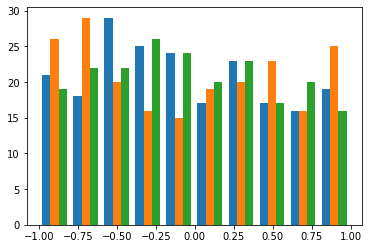

In [10]:
import matplotlib.pyplot as plt
print("Distribución de estados generados")
plt.hist(np.array(a))

In [13]:
print("Estados iniciales generados")
bloch_sphere(points=a,points_color='#189848')

Estados iniciales generados


In [12]:
print("Estados teleportados en la computadora cuántica con tomografía")
bloch_sphere(points=b,points_color=col_fidelidad)


Estados teleportados en la computadora cuántica con tomografía


## Estados teleportados con su pureza

In [15]:
print("Pureza correspondiente a estados resultantes tras el proceso de tomografía")
bloch_sphere(points=b,points_color=col_pureza,figsize=(400,400))

Pureza correspondiente a estados resultantes tras el proceso de tomografía


Text(0.5, 1.0, 'Gráfica de pureza versus posiciones en sigmax de estados resultantes de la tomografía')

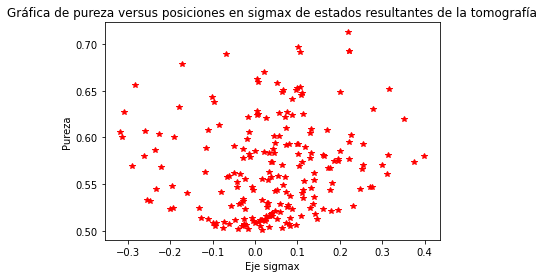

In [23]:
plt.plot(x_result,pureza,'r*')
plt.xlabel("Eje sigmax")
plt.ylabel("Pureza")
plt.title("Gráfica de pureza versus posiciones en sigmax de estados resultantes de la tomografía")

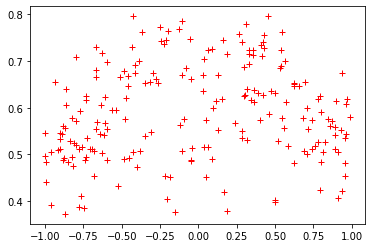

In [20]:
plt.plot(x,fidelidad,'r+')

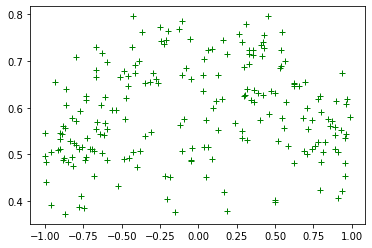

In [22]:
plt.plot(y,fidelidad,'g+')

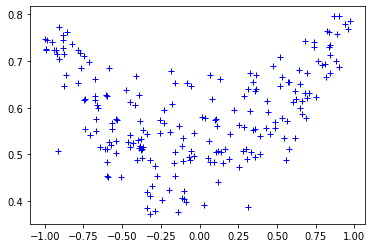

In [21]:
plt.plot(z,fidelidad,'b+')

Text(0.5, 1.0, 'Gráfica de pureza versus posiciones en sigmay de estados resultantes de la tomografía')

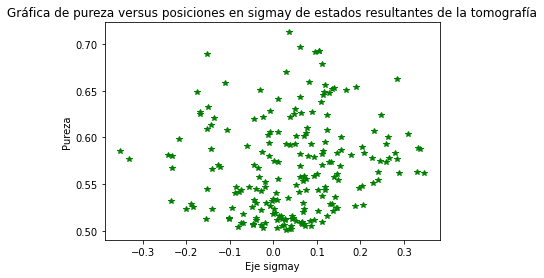

In [11]:
plt.plot(y_result,pureza,'g*')
plt.xlabel("Eje sigmay")
plt.ylabel("Pureza")
plt.title("Gráfica de pureza versus posiciones en sigmay de estados resultantes de la tomografía")

Text(0.5, 1.0, 'Gráfica de pureza versus posiciones en sigmaz de estados resultantes de la tomografía')

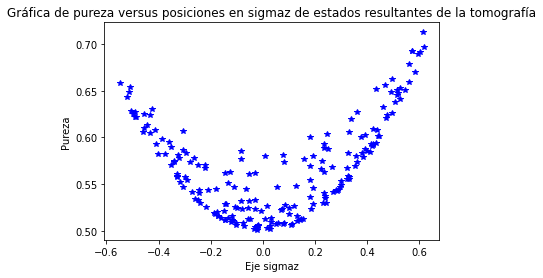

In [12]:
plt.plot(z_result,pureza,'b*')
plt.xlabel("Eje sigmaz")
plt.ylabel("Pureza")
plt.title("Gráfica de pureza versus posiciones en sigmaz de estados resultantes de la tomografía")

## Visualización de los estados iniciales con su fidelidad asociada tras haberles realizado tomografía

In [18]:
print("Fidelidad asociada a los estados estados iniciales utilizados")
bloch_sphere(points=a,points_color=col_fidelidad,figsize=(400,400))

Fidelidad asociada a los estados estados iniciales utilizados


Text(0.5, 1.0, 'Gráfica de fidelidad versus posiciones en sigmax de estados iniciales generados')

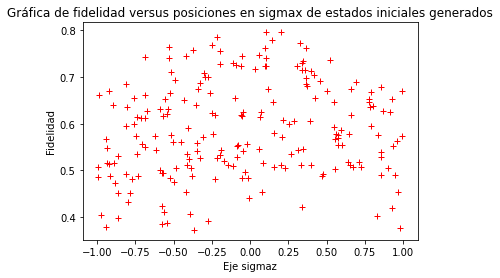

In [69]:
plt.plot(x,fidelidad,'r+')
plt.xlabel("Eje sigmaz")
plt.ylabel("Fidelidad")
plt.title("Gráfica de fidelidad versus posiciones en sigmax de estados iniciales generados")

Text(0.5, 1.0, 'Gráfica de fidelidad versus posiciones en sigmay de estados estados iniciales generados')

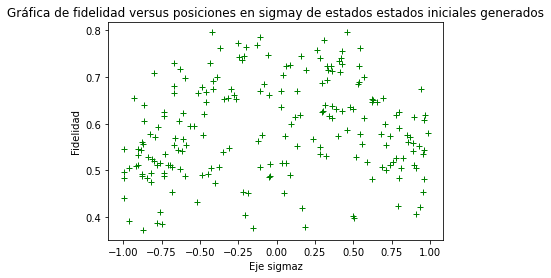

In [70]:
plt.plot(y,fidelidad,'g+')
plt.xlabel("Eje sigmaz")
plt.ylabel("Fidelidad")
plt.title("Gráfica de fidelidad versus posiciones en sigmay de estados estados iniciales generados")

Text(0.5, 1.0, 'Gráfica de fidelidad versus posiciones en sigmaz de estados iniciales generados')

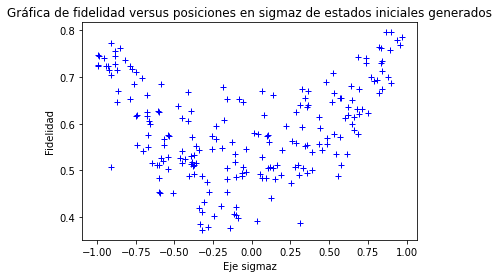

In [71]:
plt.plot(z,fidelidad,'b+')
plt.xlabel("Eje sigmaz")
plt.ylabel("Fidelidad")
plt.title("Gráfica de fidelidad versus posiciones en sigmaz de estados iniciales generados")